In [30]:
from sklearn import tree, datasets
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from sklearn import model_selection

%matplotlib inline

matplotlib.rc("xtick", labelsize=20)
matplotlib.rc("ytick", labelsize=20)

In [2]:
import pandas as pd
from urllib.request import urlretrieve
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
savepath = "winequality-red.csv"
urlretrieve(url, savepath)

('winequality-red.csv', <http.client.HTTPMessage at 0x7f61a824fa10>)

In [7]:
df = pd.read_csv("winequality-red.csv", sep=';', encoding="utf-8")
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [8]:
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [14]:
df = df.sample(frac=1).reset_index(drop=True)
df_train = df.head(1000)
df_test = df.tail(599)

In [12]:
clf = tree.DecisionTreeClassifier(max_depth=3)
cols = ["fixed acidity",
        "volatile acidity",
        "citric acid",
        "residual sugar",
        "chlorides",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "density",
        "pH",
        "sulphates",
        "alcohol"]

clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

In [18]:
print(train_accuracy)
print(test_accuracy)

0.572
0.5976627712854758


In [22]:
train_accuracies = [0.5]
test_accuracies = [0.5]

for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    
    cols = ["fixed acidity",
        "volatile acidity",
        "citric acid",
        "residual sugar",
        "chlorides",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "density",
        "pH",
        "sulphates",
        "alcohol"]
    
    clf.fit(df_train[cols], df_train.quality)
    
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )
    
    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


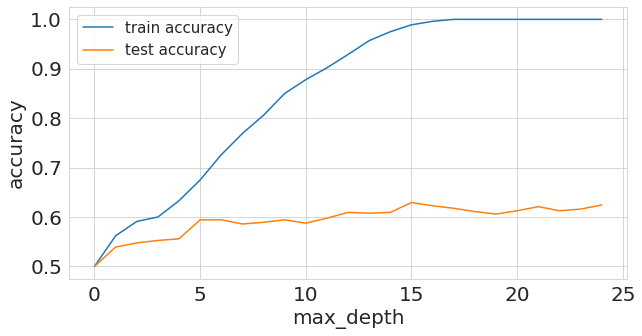

In [23]:
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={"size":15})
plt.xticks(range(0,26,5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

In [26]:
def kfold(df):
    if __name__ == "__main__":
        df = pd.read_csv("train.csv")
        df["kfold"] = -1
        df = df.sample(frac=1).reset_index(drop=True)
        kf = model_selection.KFold(n_splits=5)
        for fold, (trn_, val_) in enumerate(kf.split(X=df)):
            df.loc[val_, "kfold"] = fold
        df.to_csv("train_folds.csv", index=False)

In [27]:
def stratified_kfold(df):
    if __name__ == "__main__":
        df = pd.read_csv("train.csv")
        df["kfold"] = -1
        df = df.sample(frac=1).resec_index(drop=True)
        y = df.target.values
        kf = model_selections.StratifiedKFold(n_splits=5)
        for t, (t_, v_) in enumerate(kf.split(X=df, y=y)):
            df.loc[v_, "kfold"] = f
        df.to_csv("train_folds.csv", index=False)

Text(0, 0.5, 'count')

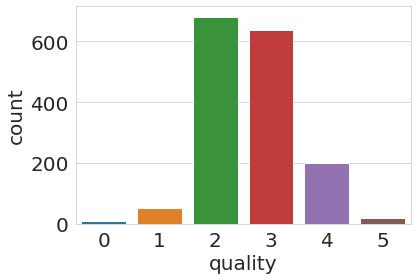

In [28]:
b = sns.countplot(x="quality", data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

In [36]:
def create_folds(data):
    data["kfold"] = -1
    data = data.sample(frac=1).reset_index(drop=True)
    
    #sturge's の法則によって、ビンの数を計算する
    num_bins = int(np.floor(1 + np.log2(len(data))))
    data.loc[:, "bins"] = pd.cut(
        data["target"],bins=num_bins, labels=False
    )
    
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, "kfold"] = f
    
    data = data.drop("bins", axis=1)
    return data

In [37]:
if __name__ == "__main__":
    X, y = datasets.make_regression(
        n_samples=150000, n_features=100, n_targets=1
    )
    
    df = pd.DataFrame(
        X,
        columns = [f"f_{i}" for i in range(X.shape[1])]
    )
    df.loc[:, "target"] = y
    
    df = create_folds(df)

In [38]:
def accuracy(y_true, y_pred):
    correct_couter = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            correct_counter += 1
    return correct_counter / len(y_true)